# Análisis predictivo utilizando aprendizaje automático
Importamos las librerías necesarias

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import requests
import io

Esta función sirve para trazar la matriz de confusión.

In [34]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

Cargamos los dataframe

In [35]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL1)
text1 = io.StringIO(response.text)
data = pd.read_csv(text1)

In [36]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = requests.get(URL2)
text2 = io.StringIO(response.text)
X = pd.read_csv(text2)

#### Creamos una matriz NumPy a partir de la columna <code>Class</code> en <code>data</code>, aplicando el método <code>to_numpy()</code> y luego lo asignamos a la variable <code>Y</code>.

In [37]:
Y = data['Class']

### Estandarizamos los datos

In [38]:
# Primero, convertimos las columnas no numéricas en X a valores numéricos o las eliminamos
# para este ejemplo, eliminaremos las columnas que no son numéricas
X = X.select_dtypes(include=[np.number])

# Ahora aplicamos el StandardScaler
transform = preprocessing.StandardScaler()
X_std = transform.fit_transform(X)

Dividimos los datos en datos de entrenamiento y de prueba utilizando la función train_test_split. Los datos de entrenamiento se dividen en datos de validación y un segundo conjunto se utiliza para los datos de entrenamiento; luego, se entrenan los modelos y se seleccionan los hiperparámetros utilizando la función GridSearchCV.

### Dividimos los datos en datos de entrenamiento y prueba utilizando el parámetro test_size en 0,2 y random_state en 2.

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2,random_state=42)

Podemos ver que solo tenemos 18 muestras de prueba.

In [40]:
Y_test.shape

(18,)

## Modelo de regresión logística
Creamos el objeto de regresión logística ybluego creamos un objeto GridSearchCV <code>logreg_cv</code> con cv = 10. Ajustamos el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.

In [41]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

# Creación del objeto GridSearchCV con cv = 10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Ajuste del objeto para encontrar los mejores parámetros
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

Generamos el objeto <code>GridSearchCV</code> para la regresión logística. Mostramos los mejores parámetros utilizando el atributo de datos <code>best_params\_</code> y la precisión de los datos de validación utilizando el atributo de datos <code>best_score\_</code>.

In [42]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 1.0


Determinamos la precisión de los datos de prueba

In [43]:
test_score1 = logreg_cv.score(X_train, Y_train)
print(f"{test_score1:.3f}")

1.000


Revisamos la matriz de confusión

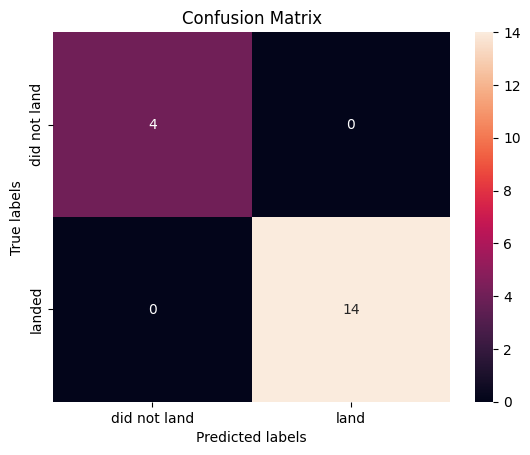

In [44]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Modelo de máquinas de vectores de soporte (SVM)
Creamos un objeto de máquina de vectores de soporte y luego generamos un objeto <code>GridSearchCV</code> <code>svm_cv</code> con cv = 10. Ajustamos el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.

In [45]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [46]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 31.622776601683793, 'kernel': 'poly'}
accuracy : 1.0


Determinamos la precisión de los datos de prueba

In [47]:
test_score2 = svm_cv.score(X_test, Y_test)
print(f"{test_score2:.3f}")

1.000


Revisamos la matriz de confusión

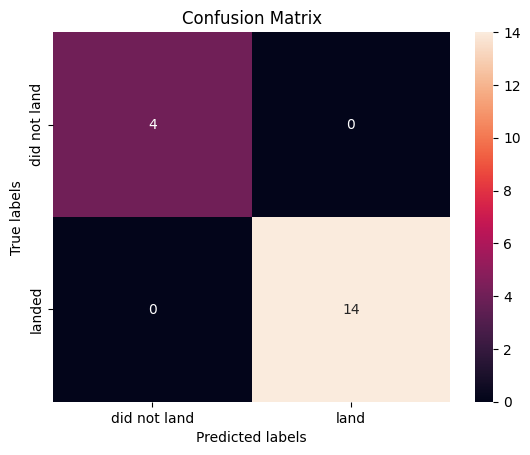

In [48]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Modelo de árboles de clasificación
Creamos un objeto clasificador de árbol de decisión y luego generamos un objeto <code>GridSearchCV</code> <code>tree_cv</code> con cv = 10. Ajustamos el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.

In [49]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    v

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [50]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 1.0


Determinamos la precisión de los datos de prueba

In [51]:
test_score3 = tree_cv.score(X_test, Y_test)
print(f"{test_score3:.3f}")

1.000


Revisamos la matriz de confusión

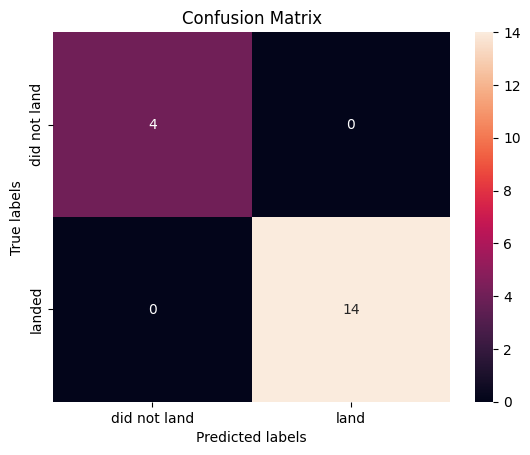

In [52]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Modelo de los K vecinos más cercanos
Creamos un objeto de k vecinos más cercanos y luego geenramos un objeto <code>GridSearchCV</code> <code>knn_cv</code> con cv = 10. Ajustamos el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.

In [53]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [54]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}
accuracy : 0.9857142857142858


Determinamos la precisión de los datos de prueba

In [55]:
test_score4 = knn_cv.score(X_test, Y_test)
print(f"{test_score4:.3f}")

1.000


Revisamos la matriz de confusión

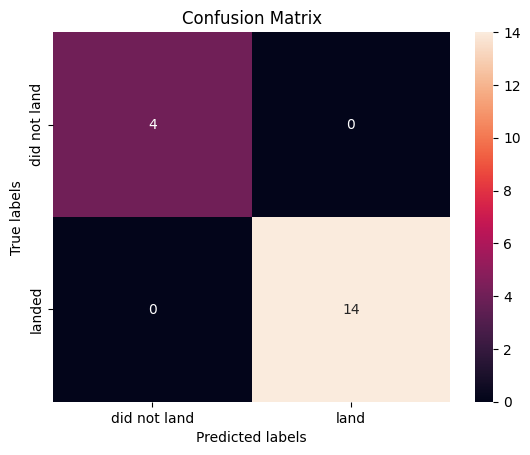

In [56]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Buscamos el modelo que funciona mejor

Regresión Logística:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Máquina de Vectores de Soporte:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Árbol de Decisión:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18

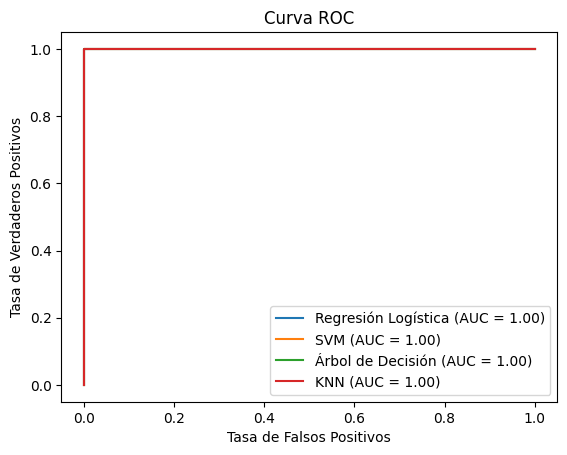

In [57]:
from sklearn.metrics import classification_report, roc_curve, auc

# Regresión Logística
yhat_logreg = logreg_cv.predict(X_test)
print("Regresión Logística:\n", classification_report(Y_test, yhat_logreg))
fpr, tpr, _ = roc_curve(Y_test, logreg_cv.predict_proba(X_test)[:,1])
roc_auc_logreg = auc(fpr, tpr)

# SVM
yhat_svm = svm_cv.predict(X_test)
print("Máquina de Vectores de Soporte:\n", classification_report(Y_test, yhat_svm))
fpr, tpr, _ = roc_curve(Y_test, svm_cv.decision_function(X_test))
roc_auc_svm = auc(fpr, tpr)

# Árbol de Decisión
yhat_tree = tree_cv.predict(X_test)
print("Árbol de Decisión:\n", classification_report(Y_test, yhat_tree))
fpr, tpr, _ = roc_curve(Y_test, tree_cv.predict_proba(X_test)[:,1])
roc_auc_tree = auc(fpr, tpr)

# KNN
yhat_knn = knn_cv.predict(X_test)
print("K Vecinos Más Cercanos:\n", classification_report(Y_test, yhat_knn))
fpr, tpr, _ = roc_curve(Y_test, knn_cv.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr, tpr)

# Graficar curvas ROC
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr, tpr, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = %0.2f)' % roc_auc_tree)
plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


## Comparación de los modelos

Regresión Logística:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



Máquina de Vectores de Soporte:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Árbol de Decisión:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

K Vecinos Más Cercanos:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00       

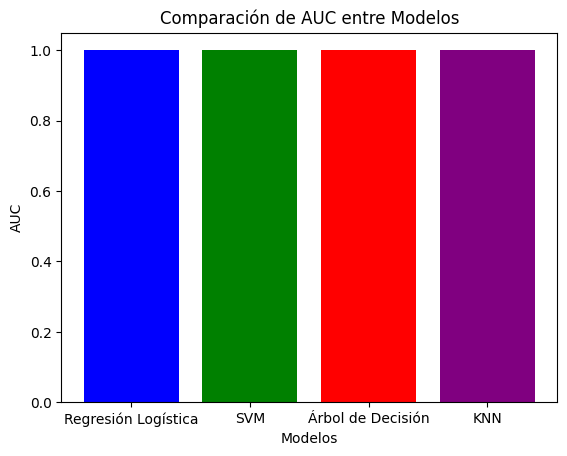

In [58]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, roc_curve, auc

# Regresión Logística
yhat_logreg = logreg_cv.predict(X_test)
print("Regresión Logística:\n", classification_report(Y_test, yhat_logreg))
fpr_logreg, tpr_logreg, _ = roc_curve(Y_test, logreg_cv.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# SVM
yhat_svm = svm_cv.predict(X_test)
print("Máquina de Vectores de Soporte:\n", classification_report(Y_test, yhat_svm))
fpr_svm, tpr_svm, _ = roc_curve(Y_test, svm_cv.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Árbol de Decisión
yhat_tree = tree_cv.predict(X_test)
print("Árbol de Decisión:\n", classification_report(Y_test, yhat_tree))
fpr_tree, tpr_tree, _ = roc_curve(Y_test, tree_cv.predict_proba(X_test)[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

# KNN
yhat_knn = knn_cv.predict(X_test)
print("K Vecinos Más Cercanos:\n", classification_report(Y_test, yhat_knn))
fpr_knn, tpr_knn, _ = roc_curve(Y_test, knn_cv.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Graficar AUC de los modelos
plt.figure()
modelos = ['Regresión Logística', 'SVM', 'Árbol de Decisión', 'KNN']
auc_scores = [roc_auc_logreg, roc_auc_svm, roc_auc_tree, roc_auc_knn]
plt.bar(modelos, auc_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Modelos')
plt.ylabel('AUC')
plt.title('Comparación de AUC entre Modelos')
plt.show()
